Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Google Drive montado correctamente
📦 Descomprimiendo dataset_balanceado.zip...

📁 Estructura del dataset:
total 32
drwxr-xr-x 5 root root 4096 Oct 28 04:01 .
drwxr-xr-x 1 root root 4096 Oct 28 04:01 ..
-rw-r--r-- 1 root root  350 Oct 28 04:01 data.yaml
-rw-r--r-- 1 root root  144 Oct 28 04:01 README.dataset.txt
-rw-r--r-- 1 root root  984 Oct 28 04:01 README.roboflow.txt
drwxr-xr-x 4 root root 4096 Oct 28 04:01 test
drwxr-xr-x 4 root root 4096 Oct 28 04:01 train
drwxr-xr-x 4 root root 4096 Oct 28 04:01 valid

📁 Contenido interno:
./data/test/:
total 132
drwxr-xr-x 4 root root  4096 Oct 28 04:01 .
drwxr-xr-x 5 root root  4096 Oct 28 04:01 ..
drwxr-xr-x 2 root root 65536 Oct 28 04:01 images
drwxr-xr-x 2 root root 57344 Oct 28 04:01 labels

./data/train/:
total 808
drwxr-xr-x 4 root root   4096 Oct 28 04:01 .
drwxr-xr-x 5 root root   4096 Oct 28 04:01 ..
drwxr

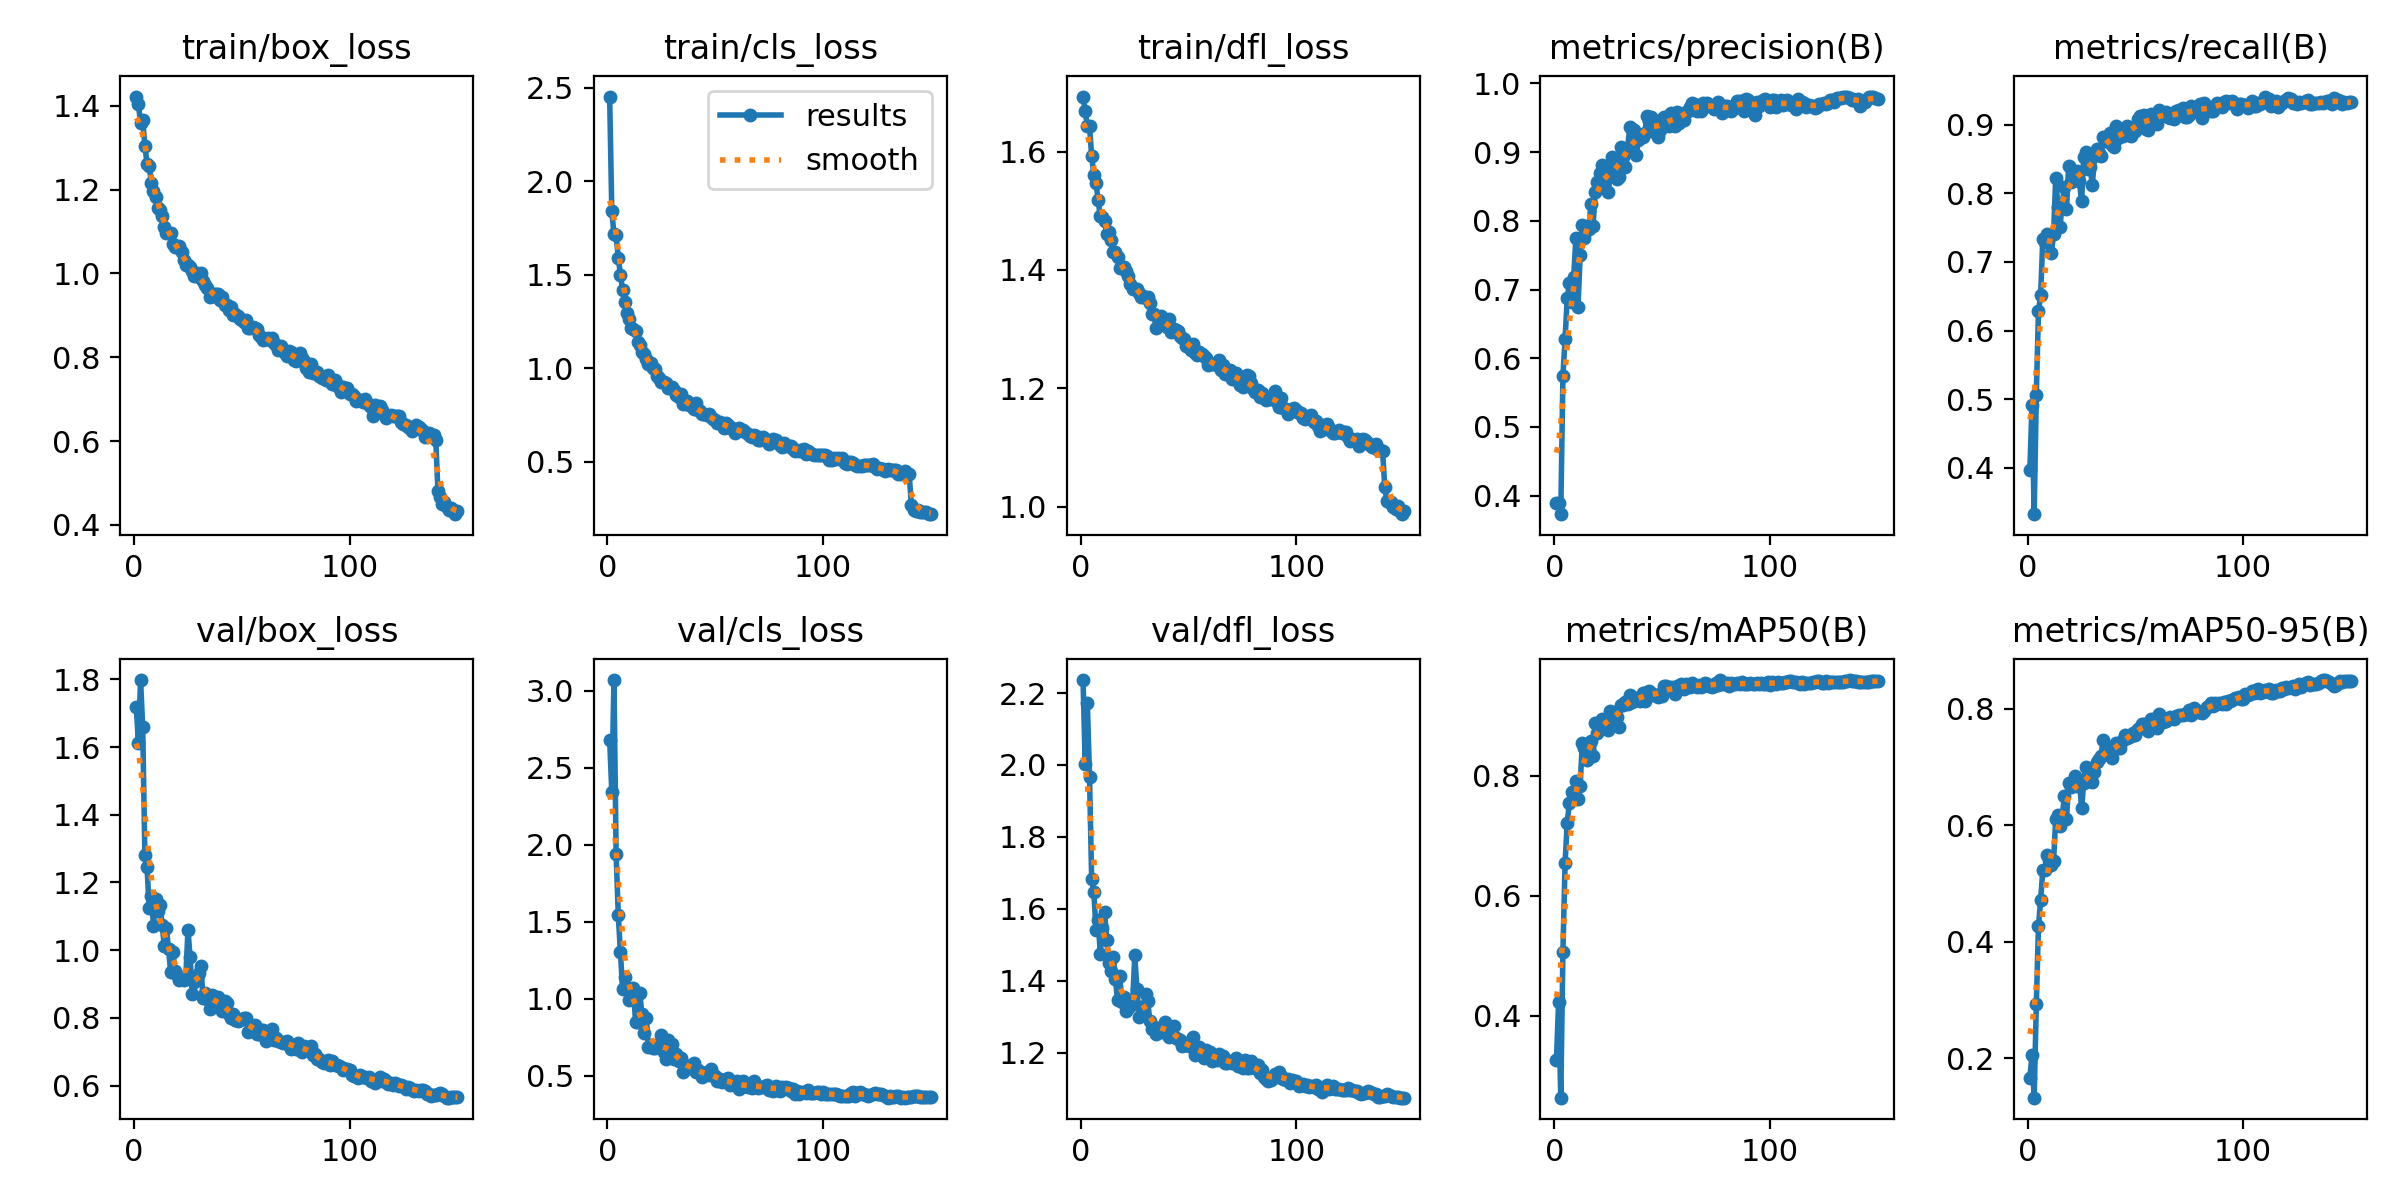


🎯 Matriz de confusión:


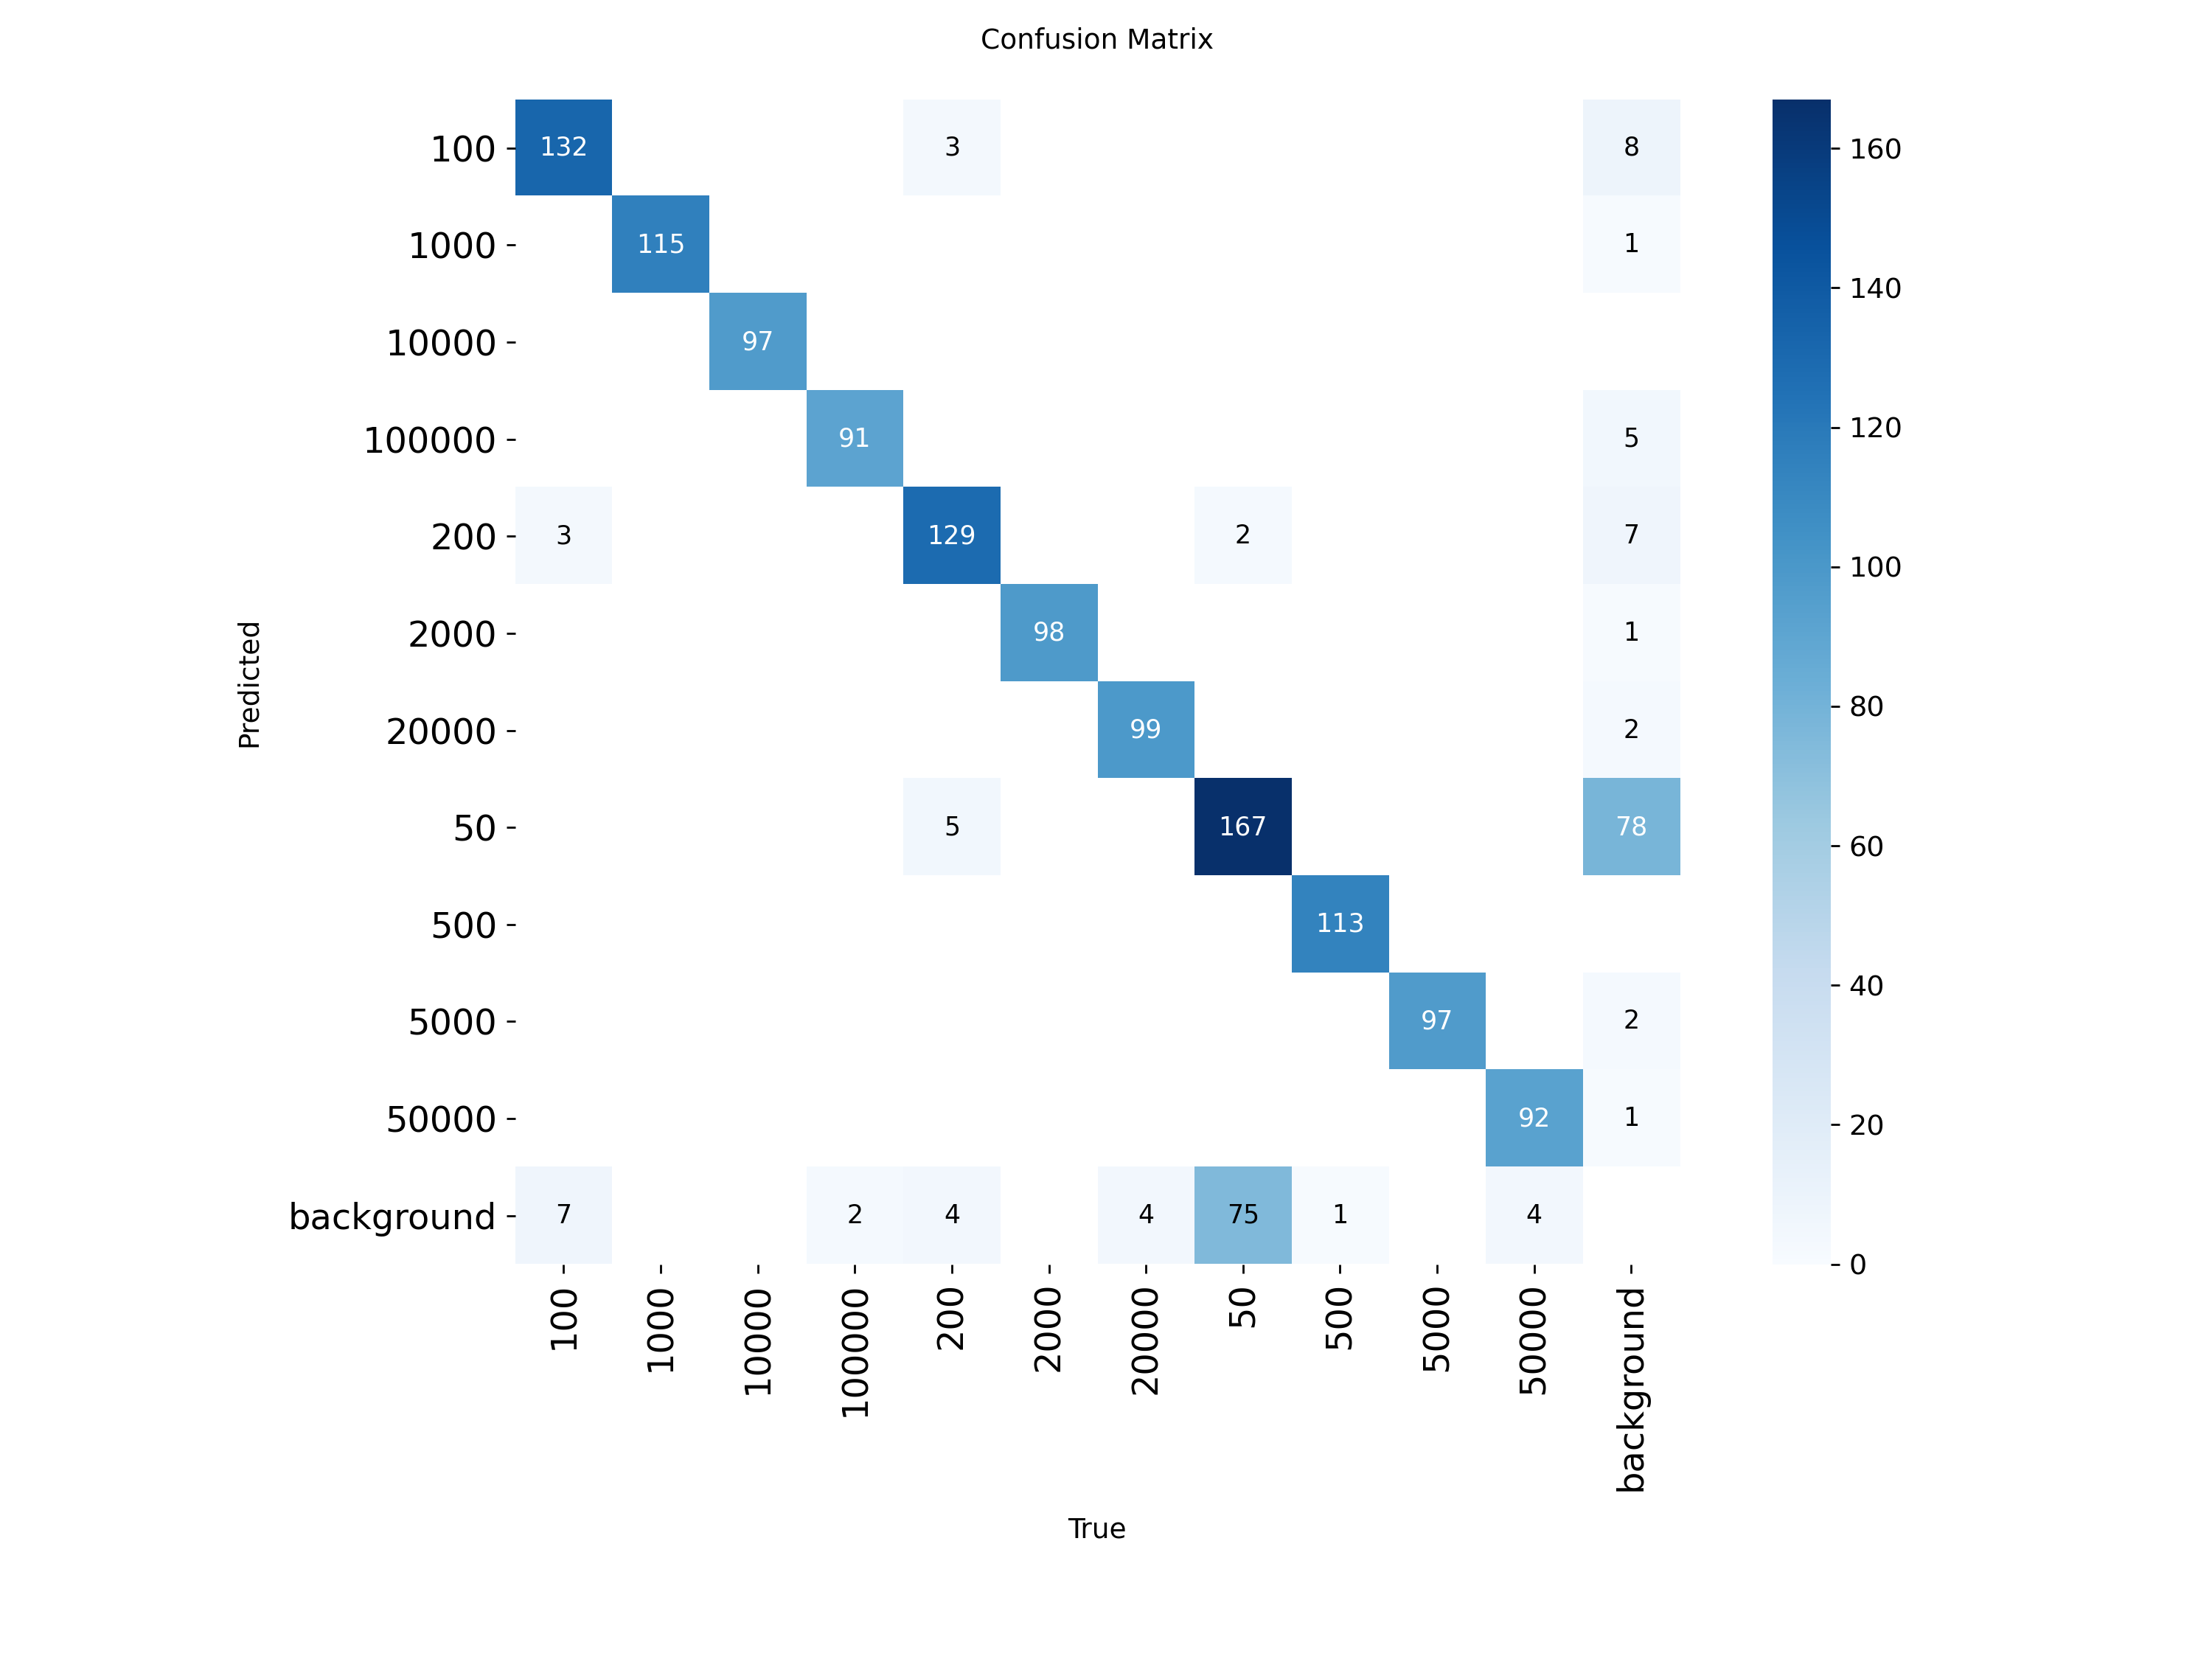


🖼️ Ejemplos de predicciones:


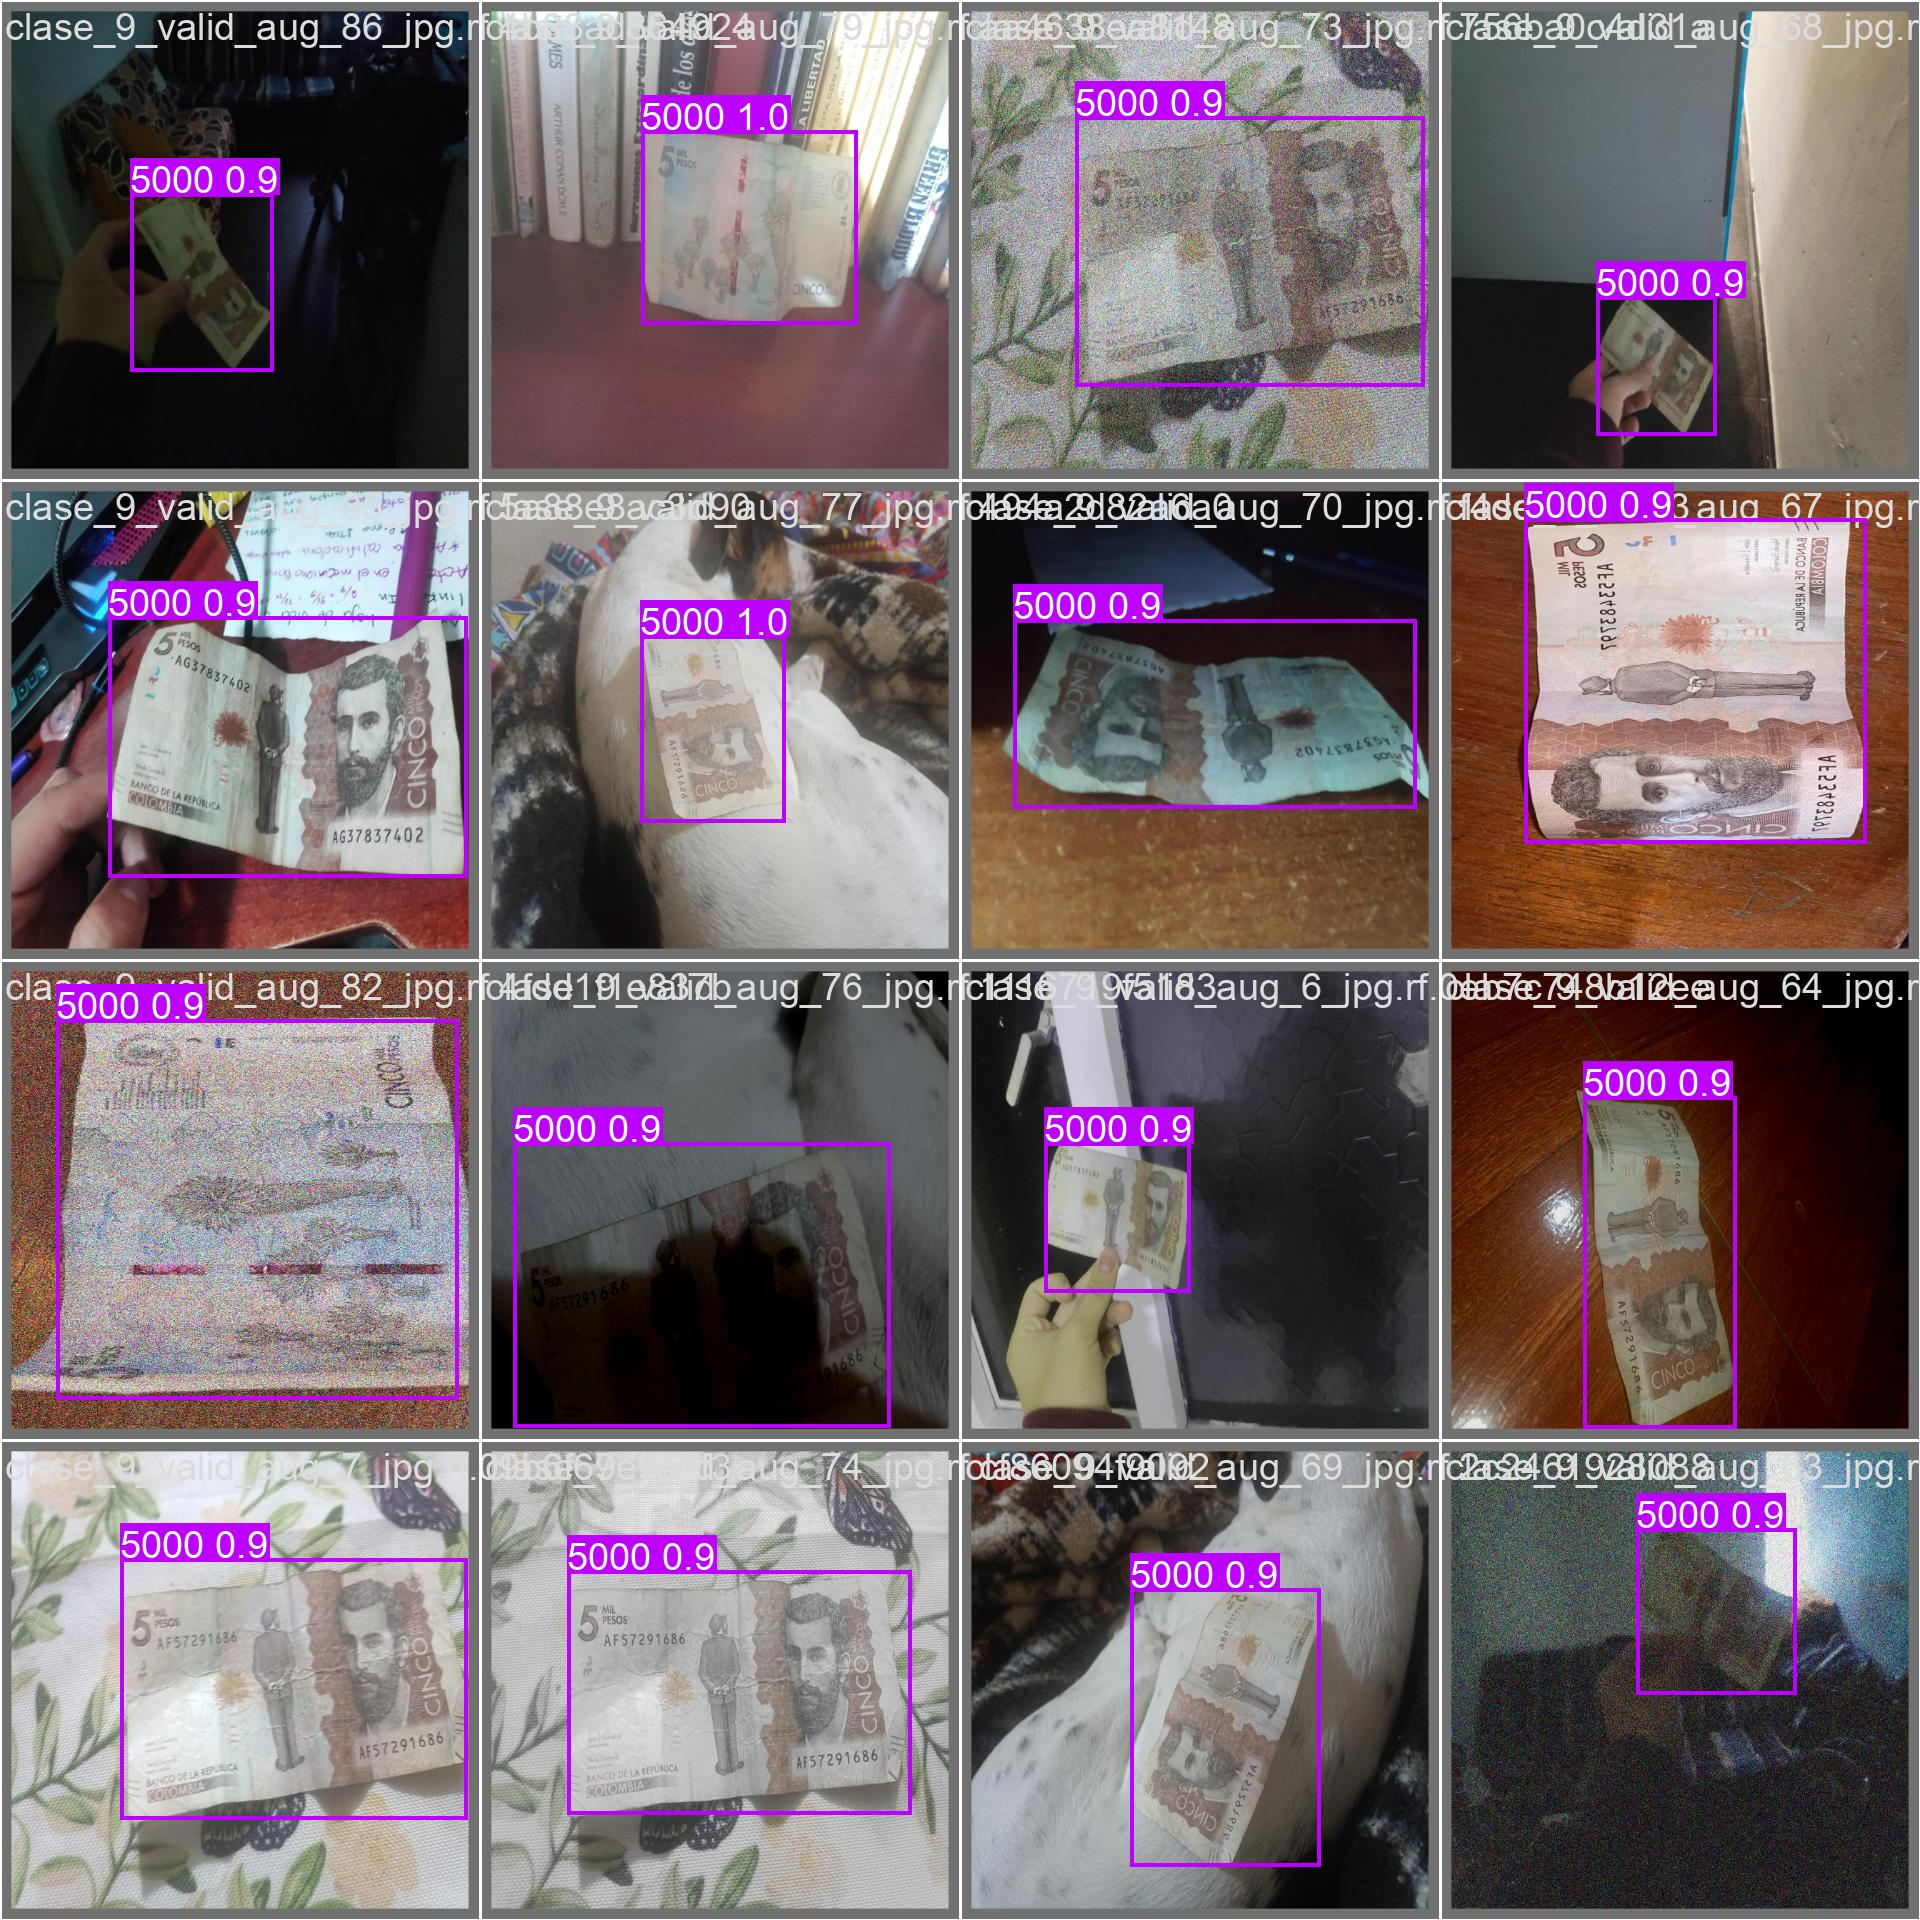

✅ Backup guardado en: /content/drive/MyDrive/IA_Dinero/runs/dinero_colombiano_balanceado_v1

📁 Archivos guardados:
   ✓ weights/best.pt (18.31 MB)
   ✓ weights/last.pt (18.31 MB)
   ✓ results.png (0.25 MB)
   ✓ confusion_matrix.png (0.18 MB)

💾 Exportando modelo...

📦 Formatos disponibles para exportar:
   - ONNX: onnx
   - TensorFlow: saved_model
   - TFLite: tflite
   - CoreML: coreml

🧪 Probando predicción con el mejor modelo...
📸 Probando con: clase_6_test_aug_31_jpg.rf.80c4cc052409ba5a1e4b7a26c70fb5c3.jpg

image 1/1 /content/data/test/images/clase_6_test_aug_31_jpg.rf.80c4cc052409ba5a1e4b7a26c70fb5c3.jpg: 640x640 1 20000, 20.0ms
Speed: 2.8ms preprocess, 20.0ms inference, 8.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/predict/test


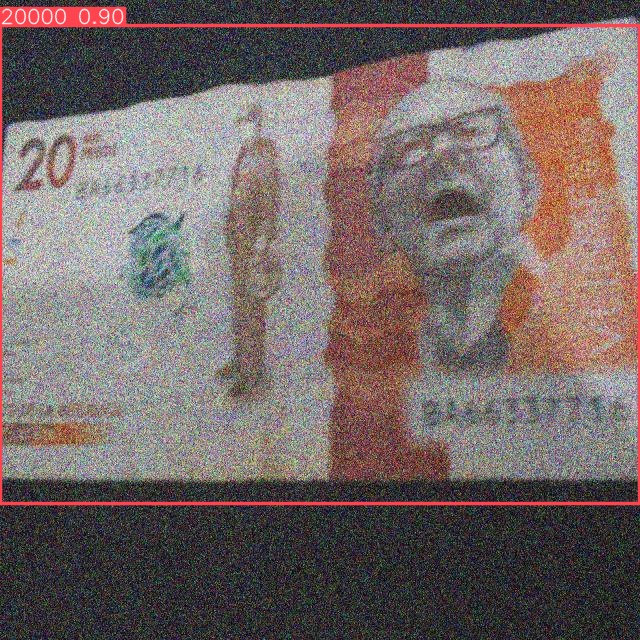

✅ Predicción exitosa

🎉 PROCESO COMPLETADO

📍 Ubicación de archivos:
   - Modelo entrenado: runs/train/dinero_colombiano_balanceado_v1/weights/best.pt
   - Backup en Drive: /content/drive/MyDrive/IA_Dinero/runs/dinero_colombiano_balanceado_v1

📊 Próximos pasos:
   1. Revisa las métricas y gráficas
   2. Si el modelo no es bueno, ajusta hiperparámetros
   3. Exporta el modelo al formato que necesites
   4. Implementa en tu aplicación

💡 Tips para mejorar:
   - Si overfitting: aumenta data augmentation o reduce épocas
   - Si underfitting: aumenta épocas o usa un modelo más grande
   - Si es lento: reduce imgsz o usa un modelo más pequeño

💡 TIPS PARA CHECKPOINTS:
✅ Se guardan automáticamente:
   - best.pt: Mejor modelo según mAP
   - last.pt: Último modelo (para reanudar)
   - epoch_N.pt: Cada 5 épocas

📁 Ubicación: runs/train/dinero_colombiano_balanceado_v1/weights/

🔄 Para reanudar si se interrumpe:
   resume_training('runs/train/dinero_colombiano_balanceado_v1/weights/last.pt')


In [ ]:
# ============================================================================
# NOTEBOOK PARA ENTRENAR YOLO - RECONOCIMIENTO DE DINERO COLOMBIANO
# Compatible con Google Colab
# Versiones soportadas: YOLOv8, YOLOv9, YOLOv10, YOLOv11
# ============================================================================

# ====================
# 1. INSTALACIÓN DE DEPENDENCIAS
# ====================
# Instalar Ultralytics (incluye YOLOv8, v9, v10 y v11)
!pip install ultralytics opencv-python matplotlib pillow --quiet

# ====================
# 2. MONTAR GOOGLE DRIVE
# ====================
from google.colab import drive
import os

drive.mount('/content/drive')
print("✅ Google Drive montado correctamente")

# ====================
# 3. CONFIGURACIÓN DEL PROYECTO
# ====================
# Rutas importantes
DRIVE_BASE = "/content/drive/MyDrive/IA_Dinero"
DATASET_ZIP = f"{DRIVE_BASE}/dataset_balanceado.zip"  # Tu dataset comprimido
BACKUP_PATH = f"{DRIVE_BASE}/runs"  # Donde se guardarán los backups

# Nombre del experimento (puedes cambiarlo)
EXPERIMENT_NAME = "dinero_colombiano_balanceado_v1"

# ====================
# 4. DESCOMPRIMIR DATASET
# ====================
import zipfile

# Crear directorio de trabajo
!rm -rf ./data  # Limpiar si existe
!mkdir -p ./data

print("📦 Descomprimiendo dataset_balanceado.zip...")
with zipfile.ZipFile(DATASET_ZIP, 'r') as zip_ref:
    zip_ref.extractall('./data')

# Verificar estructura
print("\n📁 Estructura del dataset:")
!ls -la ./data
print("\n📁 Contenido interno:")
!ls -la ./data/*/

# ====================
# 5. VERIFICAR ARCHIVO data.yaml
# ====================
# Como ya tienes el data.yaml, solo lo verificamos

import os

# Buscar el data.yaml (puede estar en diferentes ubicaciones según cómo se descomprimió)
possible_paths = [
    './data/data.yaml',
    './data/dataset_balanceado/data.yaml',
]

data_yaml_path = None
for path in possible_paths:
    if os.path.exists(path):
        data_yaml_path = path
        break

if data_yaml_path:
    print(f"✅ Archivo data.yaml encontrado en: {data_yaml_path}")
    print("\n📄 Contenido del data.yaml:")
    !cat {data_yaml_path}

    # Usar esta ruta para el entrenamiento
    DATA_YAML = data_yaml_path
else:
    print("⚠️ ERROR: No se encontró data.yaml")
    print("Verifica la estructura de tu dataset")
    # Mostrar estructura completa para debug
    !find ./data -name "*.yaml"

# ====================
# 6. SELECCIONAR VERSIÓN DE YOLO
# ====================
"""
Comparación de versiones:

YOLOv8 (yolov8n.pt, yolov8s.pt, yolov8m.pt, yolov8l.pt, yolov8x.pt)
  - Probada y estable
  - Buen equilibrio velocidad/precisión
  - Recomendado para producción

YOLOv9 (yolov9c.pt, yolov9e.pt)
  - Mejora en precisión
  - Más lento que v8
  - Mejor para datasets complejos

YOLOv10 (yolov10n.pt, yolov10s.pt, yolov10m.pt, yolov10b.pt, yolov10l.pt, yolov10x.pt)
  - Sin NMS (más rápido en inferencia)
  - Buena precisión
  - Ideal para aplicaciones en tiempo real

YOLOv11 (yolo11n.pt, yolo11s.pt, yolo11m.pt, yolo11l.pt, yolo11x.pt)
  - MÁS RECIENTE (2024)
  - Mejor precisión que v8
  - Similar velocidad a v8
  - RECOMENDADO para nuevos proyectos

Sufijos de tamaño:
  n (nano)   - Más rápido, menos preciso
  s (small)  - Balance para dispositivos móviles
  m (medium) - Recomendado para la mayoría de casos
  l (large)  - Más preciso, más lento
  x (xlarge) - Máxima precisión, muy lento
"""

# ELIGE TU MODELO AQUÍ:
# Para TIEMPO REAL con cámara, usa modelos pequeños (n o s)
MODEL_WEIGHTS = "yolo11s.pt"  # Recomendado para tiempo real: yolo11s.pt o yolov10s.pt

print(f"🎯 Modelo seleccionado: {MODEL_WEIGHTS}")
print(f"⚡ Optimizado para: DETECCIÓN EN TIEMPO REAL")

# ====================
# 7. CONFIGURACIÓN DE HIPERPARÁMETROS
# ====================
import torch  # Importar torch aquí para verificar GPU

HYPERPARAMS = {
    # Básicos - OPTIMIZADO PARA TIEMPO REAL
    "epochs": 150,          # Más épocas para modelos pequeños
    "imgsz": 640,           # 640 es óptimo para tiempo real (más rápido)
    "batch": 32,            # Batch más grande para modelos pequeños

    # Optimización
    "optimizer": "AdamW",   # Adam, AdamW, SGD
    "lr0": 0.001,           # Learning rate inicial
    "lrf": 0.01,            # Learning rate final (fracción de lr0)
    "momentum": 0.937,      # Momentum para SGD
    "weight_decay": 0.0005, # Regularización

    # Data Augmentation (para mejorar generalización)
    "degrees": 15.0,        # Rotación aleatoria (grados)
    "translate": 0.1,       # Traslación (fracción)
    "scale": 0.5,           # Escala (±50%)
    "shear": 2.0,           # Deformación (grados)
    "fliplr": 0.5,          # Flip horizontal (probabilidad)
    "flipud": 0.0,          # Flip vertical
    "mosaic": 1.0,          # Mosaic augmentation
    "mixup": 0.1,           # Mixup augmentation
    "hsv_h": 0.015,         # Variación de matiz
    "hsv_s": 0.7,           # Variación de saturación
    "hsv_v": 0.4,           # Variación de brillo

    # Guardar resultados
    "project": "runs/train",
    "name": EXPERIMENT_NAME,
    "exist_ok": True,
    "save_period": 5,       # Guardar checkpoint cada 5 épocas (balance espacio/seguridad)

    # Otros
    "patience": 50,         # Early stopping (épocas sin mejora)
    "workers": 8,           # Número de workers para carga de datos
    "device": 0 if torch.cuda.is_available() else 'cpu',  # GPU si está disponible, sino CPU
}

# ====================
# 8. ENTRENAR EL MODELO
# ====================
from ultralytics import YOLO

# Verificar disponibilidad de GPU
gpu_available = torch.cuda.is_available()
print(f"🔥 GPU disponible: {gpu_available}")

if gpu_available:
    print(f"🎮 GPU: {torch.cuda.get_device_name(0)}")
    print("✅ Entrenamiento con GPU - Tiempo estimado: 2-4 horas")
else:
    print("⚠️ GPU NO DISPONIBLE - Usando CPU")
    print("❌ El entrenamiento será MUY LENTO (puede tardar 20+ horas)")
    print("\n🔧 Para activar GPU en Colab:")
    print("   1. Runtime → Change runtime type")
    print("   2. Hardware accelerator → T4 GPU")
    print("   3. Save y reiniciar el notebook\n")

    # Reducir batch size para CPU
    if HYPERPARAMS['batch'] > 8:
        print("📉 Reduciendo batch size de 32 a 8 para CPU...")
        HYPERPARAMS['batch'] = 8

# Cargar modelo
model = YOLO(MODEL_WEIGHTS)

print(f"\n🚀 Iniciando entrenamiento...")
print(f"📊 Configuración:")
print(f"   - Épocas: {HYPERPARAMS['epochs']}")
print(f"   - Batch size: {HYPERPARAMS['batch']}")
print(f"   - Tamaño imagen: {HYPERPARAMS['imgsz']}")
print(f"   - Modelo: {MODEL_WEIGHTS}\n")

# Entrenar
results = model.train(
    data=DATA_YAML,  # Usar la ruta encontrada automáticamente
    **HYPERPARAMS
)

print("\n✅ Entrenamiento completado!")

# ====================
# 9. EVALUAR EL MODELO
# ====================
print("\n📈 Evaluando en conjunto de validación...")
metrics = model.val()

print(f"\n📊 Métricas finales:")
print(f"   - mAP50: {metrics.box.map50:.4f}")
print(f"   - mAP50-95: {metrics.box.map:.4f}")
print(f"   - Precisión: {metrics.box.mp:.4f}")
print(f"   - Recall: {metrics.box.mr:.4f}")

# ====================
# 10. VISUALIZAR RESULTADOS
# ====================
from IPython.display import Image, display

# Mostrar curvas de entrenamiento
training_results = f"runs/train/{EXPERIMENT_NAME}/results.png"
if os.path.exists(training_results):
    print("\n📉 Curvas de entrenamiento:")
    display(Image(filename=training_results))

# Mostrar matriz de confusión
confusion_matrix = f"runs/train/{EXPERIMENT_NAME}/confusion_matrix.png"
if os.path.exists(confusion_matrix):
    print("\n🎯 Matriz de confusión:")
    display(Image(filename=confusion_matrix))

# Mostrar ejemplos de validación
val_batch = f"runs/train/{EXPERIMENT_NAME}/val_batch0_pred.jpg"
if os.path.exists(val_batch):
    print("\n🖼️ Ejemplos de predicciones:")
    display(Image(filename=val_batch))

# ====================
# 11. GUARDAR BACKUP EN DRIVE
# ====================
import shutil

def backup_to_drive():
    """Copia los resultados del entrenamiento a Google Drive"""
    source = f"runs/train/{EXPERIMENT_NAME}"
    destination = f"{BACKUP_PATH}/{EXPERIMENT_NAME}"

    if os.path.exists(source):
        os.makedirs(os.path.dirname(destination), exist_ok=True)
        shutil.copytree(source, destination, dirs_exist_ok=True)
        print(f"✅ Backup guardado en: {destination}")

        # Listar archivos importantes
        print("\n📁 Archivos guardados:")
        important_files = [
            "weights/best.pt",
            "weights/last.pt",
            "results.png",
            "confusion_matrix.png"
        ]
        for file in important_files:
            file_path = f"{destination}/{file}"
            if os.path.exists(file_path):
                size = os.path.getsize(file_path) / (1024*1024)  # MB
                print(f"   ✓ {file} ({size:.2f} MB)")
    else:
        print("⚠️ No se encontró la carpeta de resultados")

# Ejecutar backup
backup_to_drive()

# ====================
# 12. EXPORTAR MODELO (OPCIONAL)
# ====================
print("\n💾 Exportando modelo...")

# Ruta al mejor modelo
best_model_path = f"runs/train/{EXPERIMENT_NAME}/weights/best.pt"
best_model = YOLO(best_model_path)

# Exportar a diferentes formatos
export_formats = {
    "ONNX": "onnx",           # Para producción multiplataforma
    "TensorFlow": "saved_model",  # Para TensorFlow
    "TFLite": "tflite",       # Para Android/dispositivos móviles
    "CoreML": "coreml",       # Para iOS
}

print("\n📦 Formatos disponibles para exportar:")
for name, format_type in export_formats.items():
    print(f"   - {name}: {format_type}")

# Descomentar para exportar (ejemplo con ONNX)
# best_model.export(format="onnx")
# print("✅ Modelo exportado a ONNX")

# ====================
# 13. PROBAR PREDICCIÓN
# ====================
print("\n🧪 Probando predicción con el mejor modelo...")

# Buscar una imagen de prueba
test_images_dir = "./data/test/images" if os.path.exists("./data/test/images") else "./data/valid/images"
test_images = [f for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

if test_images:
    test_image = os.path.join(test_images_dir, test_images[0])
    print(f"📸 Probando con: {test_images[0]}")

    # Realizar predicción
    results = best_model.predict(
        source=test_image,
        save=True,
        conf=0.25,  # Umbral de confianza
        project="runs/predict",
        name="test"
    )

    # Mostrar resultado
    pred_image = f"runs/predict/test/{test_images[0]}"
    if os.path.exists(pred_image):
        display(Image(filename=pred_image))
        print("✅ Predicción exitosa")

# ====================
# 14. RESUMEN FINAL
# ====================
print("\n" + "="*60)
print("🎉 PROCESO COMPLETADO")
print("="*60)
print(f"\n📍 Ubicación de archivos:")
print(f"   - Modelo entrenado: runs/train/{EXPERIMENT_NAME}/weights/best.pt")
print(f"   - Backup en Drive: {BACKUP_PATH}/{EXPERIMENT_NAME}")
print(f"\n📊 Próximos pasos:")
print("   1. Revisa las métricas y gráficas")
print("   2. Si el modelo no es bueno, ajusta hiperparámetros")
print("   3. Exporta el modelo al formato que necesites")
print("   4. Implementa en tu aplicación")
print("\n💡 Tips para mejorar:")
print("   - Si overfitting: aumenta data augmentation o reduce épocas")
print("   - Si underfitting: aumenta épocas o usa un modelo más grande")
print("   - Si es lento: reduce imgsz o usa un modelo más pequeño")
print("="*60)

# ====================
# 15. FUNCIÓN DE UTILIDAD PARA REANUDAR ENTRENAMIENTO
# ====================
def resume_training(checkpoint_path, additional_epochs=50):
    """
    Reanuda el entrenamiento desde un checkpoint

    Args:
        checkpoint_path: Ruta al archivo .pt (ej: 'runs/train/exp/weights/last.pt')
        additional_epochs: Épocas adicionales a entrenar
    """
    model = YOLO(checkpoint_path)

    results = model.train(
        data=DATA_YAML,
        epochs=additional_epochs,
        resume=True,
        **{k: v for k, v in HYPERPARAMS.items() if k != 'epochs'}
    )

    print("✅ Entrenamiento reanudado completado")
    backup_to_drive()  # Hacer backup automático
    return results

# Ejemplo de uso (descomenta si necesitas reanudar):
# resume_training(f"runs/train/{EXPERIMENT_NAME}/weights/last.pt", additional_epochs=50)

# ====================
# 16. BACKUP AUTOMÁTICO PERIÓDICO (OPCIONAL)
# ====================
"""
Si quieres hacer backups automáticos cada N épocas durante el entrenamiento,
puedes usar callbacks de Ultralytics. Descomenta este código:

from ultralytics.utils.callbacks import Callbacks

def on_train_epoch_end(trainer):
    # Hacer backup cada 25 épocas
    if trainer.epoch > 0 and trainer.epoch % 25 == 0:
        print(f"\n💾 Backup automático en época {trainer.epoch}...")
        backup_to_drive()

# Agregar el callback antes de entrenar
model.add_callback("on_train_epoch_end", on_train_epoch_end)
"""

print("\n" + "="*60)
print("💡 TIPS PARA CHECKPOINTS:")
print("="*60)
print(f"✅ Se guardan automáticamente:")
print(f"   - best.pt: Mejor modelo según mAP")
print(f"   - last.pt: Último modelo (para reanudar)")
print(f"   - epoch_N.pt: Cada {HYPERPARAMS['save_period']} épocas")
print(f"\n📁 Ubicación: runs/train/{EXPERIMENT_NAME}/weights/")
print(f"\n🔄 Para reanudar si se interrumpe:")
print(f"   resume_training('runs/train/{EXPERIMENT_NAME}/weights/last.pt')")
print("="*60)